<a href="https://colab.research.google.com/github/xknobm00/MPA-MLF/blob/main/CV4(lab2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MPA-MLF, Lab 2 - Clustering and K-means**

## What is Clustering?

Clustering is an unsupervised machine learning technique used to group similar data points together. The goal of clustering is to find hidden patterns or structures in the data without requiring predefined labels. It is widely used in various applications such as customer segmentation, image compression, anomaly detection, and document classification.

# Exercise 1 - K-means from scratch

## Implementing K-means

In this exercise, the task would be to implement a simple k-means algorithm from scratch, as described above. Let's rewrite the steps to be more readily implementable

## **Code**

Please note that the code structure provided below is only a recommendation. If you prefer, you can use your code structure. If you are familiar with OOP, you can also use it. However, writing your code in one function or not using functions at all is not the recommended approach

In [63]:
import matplotlib.pyplot as plt
import copy
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import KMeans

## 0. Load dataset

Use the following code to load data

In [64]:
from google.colab import files
uploaded = files.upload()

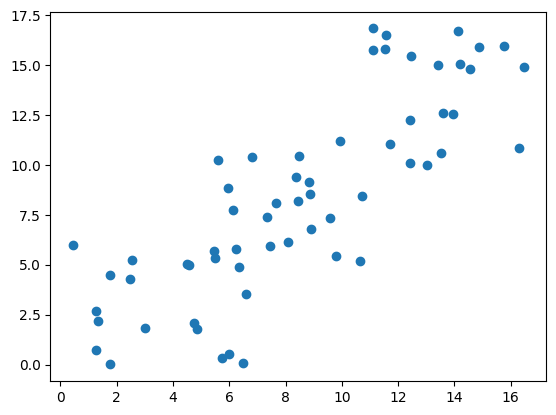

In [67]:
loaded_points = np.load('k_mean_points.npy')

plt.figure()
plt.scatter(loaded_points[:,0],loaded_points[:,1])

# 1. Specify number of clusters K

In [68]:
k = 3

loaded_points.shape

(60, 2)

## 2. initialize centroids

There are more techniques, on how to change initial centroids. In out case, we will take all available points and shuffle them randomly, then we will choose first k_clusters points as initial centroids

In [69]:
def initialize_clusters(points: np.ndarray, k_clusters: int) -> np.ndarray:
    """
    Initializes and returns k random centroids from the given dataset.

    :param points: Array of data points.
    :type: points ndarray with shape (n, 2)

    :param k_clusters: The number of clusters to form
    :type k_clusters: int


    :return: initial_clusters
    initial_clusters: Array of initialized centroids

    :rtype:
    initial_clusters: np.array (k_clusters, 2)
    :

    """

    ###################################
    # Write your own code here #
    initial_clusters = points[np.random.choice(points.shape[0], size=k_clusters, replace=False),:]


    ###################################

    return initial_clusters



In [70]:
ini_clusters = initialize_clusters(loaded_points, k)
print(ini_clusters)

[[4.55508778 4.99697372]
 [5.4846864  5.3403198 ]
 [1.27666944 2.6961478 ]]


## 3. Calculate distance from centroids to all points in datasets

3.1 Fistly, create a function to calculate distance from one centroid to all points in the dataset

In [71]:

def calculate_metric(points: np.ndarray, centroid: np.ndarray) -> np.ndarray:
    """
    Calculates the distance metric between each point and a given centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroid: A single centroid
    :type centroid: ndarray with shape (1, 2)

    :return: distances_array
    distances_array: Array of distances from point to centroid

    :rtype:
    distances_array: ndarray with shape (n,)
    :
    """

    ###################################
    # Write your own code here #

    # distances_array = np.square(norm(points-centroid, axis=1))
    distances_array = (norm(points - centroid, axis=1))

    ###################################

    return distances_array

In [72]:
print(loaded_points)
metrics=calculate_metric(loaded_points, ini_clusters[1])

[[4.85118811e+00 1.78914034e+00]
 [6.57977375e+00 3.55640765e+00]
 [5.46249345e+00 5.69923549e+00]
 [5.48468640e+00 5.34031980e+00]
 [6.34312913e+00 4.88965840e+00]
 [4.53674641e-01 5.98985979e+00]
 [4.73961567e+00 2.10435052e+00]
 [4.50247638e+00 5.03258765e+00]
 [2.53970335e+00 5.26471704e+00]
 [1.27517936e+00 7.21528315e-01]
 [1.77123907e+00 8.95721197e-03]
 [5.73224268e+00 3.48706783e-01]
 [3.00786776e+00 1.85993730e+00]
 [6.49968785e+00 1.06601479e-01]
 [1.27666944e+00 2.69614780e+00]
 [1.34156806e+00 2.18795613e+00]
 [2.46318131e+00 4.31101006e+00]
 [1.76717956e+00 4.49617009e+00]
 [6.00496171e+00 5.58578050e-01]
 [4.55508778e+00 4.99697372e+00]
 [8.38223854e+00 9.39009357e+00]
 [7.35303759e+00 7.37369046e+00]
 [6.81116690e+00 1.04018792e+01]
 [5.60854498e+00 1.02620318e+01]
 [9.58603089e+00 7.36472467e+00]
 [8.83088345e+00 9.17169381e+00]
 [6.14700838e+00 7.74303618e+00]
 [1.07252941e+01 8.44486038e+00]
 [7.66355388e+00 8.09644192e+00]
 [8.42711609e+00 8.19761435e+00]
 [1.063519

3.2 Secondly, create a function to calculate distance between points and all centroids using function from 3.1

In [73]:
def compute_distances(points: np.ndarray, centroids_points: np.ndarray) -> np.ndarray:
    """
    Computes and returns the distance from each point to each centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroids_points: A all centroid points
    :type centroids_points: ndarray with shape (k_clusters, 2)


    :return: distances_array
    distances_array: 2D array with distances of each point to each centroid.

    :rtype:
    distances_array: ndarray of shape (k_clusters, n)
    """
    ###################################
    # Write your own code here #

    distance_list = []

    for centroid in centroids_points:
        distances = calculate_metric(points, centroid)
        distance_list.append(distances)

    distances_array = np.asarray(distance_list)
    ###################################

    return distances_array

In [74]:
dis_array = compute_distances(loaded_points, ini_clusters)
print(dis_array)

[[ 3.22147022  2.48487101  1.14741302  0.99097938  1.79125891  4.21988299
   2.89850298  0.06353197  2.03309145  5.38862066  5.71227821  4.79500565
   3.49784037  5.2628139   4.00522493  4.2681716   2.20150376  2.83253182
   4.66920663  0.          5.82636979  3.671145    5.85686747  5.36941417
   5.56027276  5.97584442  3.17412512  7.06819415  4.38967706  5.0236146
   6.08326923  8.21483498  5.24988272  1.8609779   3.02712868  4.70164131
   4.10974374  6.73256472  5.58128158  3.71774064 13.49786152 15.49818177
  13.10417248 13.36251813 11.8000641  15.14001565 12.04924979 10.71148271
  10.56088299  9.37369032  9.86190615 13.93054234 14.00440152 12.58753451
  13.12508588 12.89865595 15.02048723 15.68934385 13.54141131  9.37267041]
 [ 3.6072421   2.09321735  0.35960117  0.          0.96954609  5.07276863
   3.32063662  1.02928888  2.94595332  6.2492547   6.49716231  4.99774795
   4.27173183  5.33123207  4.96981411  5.20603749  3.19201685  3.81214452
   4.80996263  0.99097938  4.97960601 

## 4. Assign datapoints to the closest centroids

In [75]:
def assign_centroids(distances: np.ndarray) -> np.ndarray:
    """
    Assigns each point to the closest centroid based on the distances.

    Parameters:
    :param distances: 2D array with distances of each point to each centroid.
    :type distances: ndarray with shape (k_clusters, n)

    :return: assigned_clusters
    assigned_clusters: Array indicating the closest centroid for each data point.

    :rtype:
    assigned_centroids: ndarray with shape (1, n) and dtype = np.int32
    """

    ###################################
    # Write your own code here #

    assigned_centroids = np.argmin(distances, axis=0)
    ###################################

    return assigned_centroids



In [76]:
assigned_centroid = assign_centroids(dis_array)
print(assigned_centroid)

[0 1 1 1 1 2 0 0 0 2 2 0 2 0 2 2 2 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## 5. Calculate objective function

In [77]:
def calculate_objective(assigned_centroids: np.ndarray, distances: np.ndarray) -> np.ndarray:
    """
    Calculates and returns the objective function value for the clustering.

    Parameters:
    :param assigned_centroids: Array indicating the cluster assignment for each point.
    :type assigned_centroids: ndarray with shape (1, n) and and dtype = np.int64

    :param distances: 2D array with distances of each point to each centroid
    :type distances: ndarray with shape (k_clusters, n) and and dtype = np.float64

    :return: onjective_function_value
    onjective_function_value: Objective function value.

    :rtype:
    onjective_function_value: float32


    """
    ###################################
    # Write your own code here #

    objective_function_value = 0
    for i in range(60-1):
      if assigned_centroids[i] == 0:
        objective_function_value = objective_function_value + distances[0, i]
      if assigned_centroids[i] == 1:
        objective_function_value = objective_function_value + distances[1, i]
      if assigned_centroids[i] == 2:
        objective_function_value = objective_function_value + distances[2, i]

    ###################################

    return objective_function_value

In [78]:
obj_fcn_value = calculate_objective(assigned_centroid, dis_array)
print(obj_fcn_value)

353.8876461380125


## 6. Compute new controids to the clusters by taking the average of the all data points that belong to each cluster

In [79]:
def calculate_new_centroids(points: np.ndarray, assigned_centroids: np.ndarray, k_clusters: int) -> np.ndarray:
    """
    Computes new centroids based on the current cluster assignments.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param assigned_centroids: Array indicating the closest centroid for each data point.
    :type assigned_centroids: ndarray with shape (1, n) and dtype = np.int32


    :param k_clusters: Number of clusters.
    :type k_clusters: int


    :return: new_clusters
    new_clusters: new cluster points

    :rtype:
    new_clusters: ndarray with shape (1, n) and dtype = np.float32
    """

    ###################################
    # Write your own code here #

    new_centroids = []
    for cluster in range(k_clusters):
      ind = np.where(assigned_centroids == cluster)
      new_centroids.append(np.mean(points[ind], axis=0))

    new_clusters = np.asarray(new_centroids)

    ###################################

    return new_clusters

In [80]:
new_clusters = calculate_new_centroids(loaded_points, assigned_centroid, k)
print(new_clusters)

[[ 4.92812044  2.52520695]
 [10.36026883 10.43375823]
 [ 1.6695699   2.78394584]]


## 7. repeat steps 2-6. until there is no change in objective function or until the maximum n of iterations is reached

In [83]:
def fit(points: np.ndarray, k_clusters: int, n_of_oterations: int, error: float = 0.001) -> tuple:
    """
    Fits the k-means clustering model on the dataset.

    Parameters:
    :param points : Array of data points.
    :type points: ndarray with shape (n, 2) and dtype = np.float32

    :param k_clusters:  Number of clusters
    :type k_clusters: int

    :param n_of_oterations:  Maximum number of iterations
    :type n_of_oterations: int


    :param error: Threshold for convergence.
    :type error: float

    :return: centroid_points, last_objective
    centroid_points: final centroid points
    last_objective: final objective funtion

    :rtype:
    centroid_points: ndarray with shape (k_clusters, 2) and dtype = np.float32
    last_objective: float

    """

    ###################################
    # Write your own code here #

    centroid_points = initialize_clusters(points, k_clusters)
    last_objective = 10000.0

    for i in range(n_of_iterations):
        distances = compute_distances(points, centroid_points)
        assigned_centroids = assign_centroids(distances)

        objective = calculate_objective(assigned_centroids, distances)

        if abs(last_objective - objective) < error:
          break
        last_objective = objective

        centroid_points = calculate_new_centroids(points, assigned_centroids, k_clusters)

    ###################################

    return centroid_points, last_objective

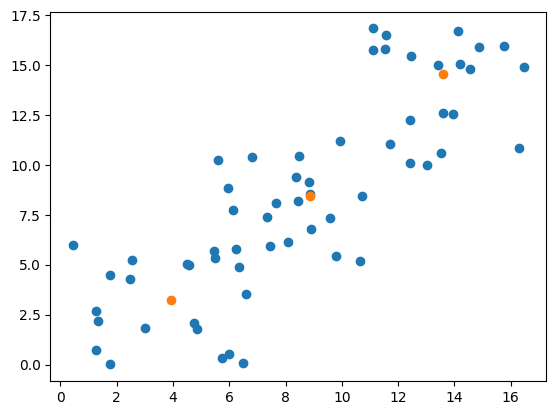

In [84]:
centroids, last_obj_fcn = fit(loaded_points, k, 1000)

plt.figure()
plt.scatter(loaded_points[:,0],loaded_points[:,1])
plt.scatter(centroids[:, 0], centroids[:, 1])

# Exercise 2 - Implementing an Elbow Method

In [85]:
k_all = range(2, 10)
all_objective = []


#WRITE YOUR CODE HERE
n = 1000

for i in k_all:
    _, obj = fit(loaded_points, k, n)
    all_objective.append(obj)

Text(0, 0.5, 'Sum of squared distance')

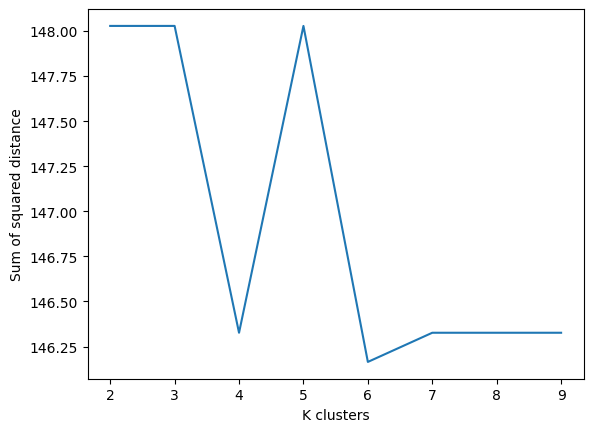

In [86]:
plt.figure()
plt.plot(k_all, all_objective)
plt.xlabel('K clusters')
plt.ylabel('Sum of squared distance')

# Exercise 3 - Image Compression

In [87]:
from matplotlib.image import imread
from sklearn.cluster import KMeans
import numpy as np

In [88]:
from google.colab import files
uploaded = files.upload()

Saving fish.jpg to fish.jpg


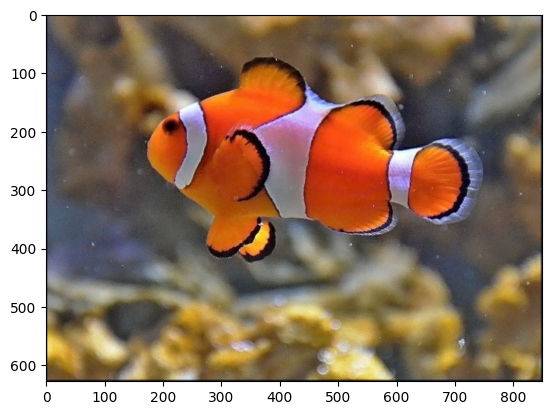

In [89]:
loaded_image = imread('fish.jpg')

plt.imshow(loaded_image)
plt.show()

In [94]:
def compress_image(image: np.ndarray, number_of_colours: int) -> np.ndarray:
    """
    Compresses the given image by reducing the number of colours used in the image.

    This function applies k-means clustering to group the pixel colours of the image
    into 'number_of_colours' clusters. Each pixel's colour in the image is then replaced
    with the colour of the closest centroid of these clusters. This process effectively
    reduces the number of colours in the image, resulting in compression.

    Parameters:
    image (np.array): The original image is represented as a 3D numpy array
                      (height x width x color_channels).
    number_of_colours (int): The number of colours to reduce the image to.

    Returns:
    np.array: The compressed image as a numpy array in the same shape as the input.
    """
    shape = image.shape
    reshaped_image = image.reshape(-1, image.shape[2])
    kmeans = KMeans(n_clusters=number_of_colours, random_state=42)
    kmeans.fit(reshaped_image)
    new_colors = np.round(kmeans.cluster_centers_).astype(int)
    compressed_image = new_colors[kmeans.labels_]
    compressed_image = compressed_image.reshape(image.shape)

    return image

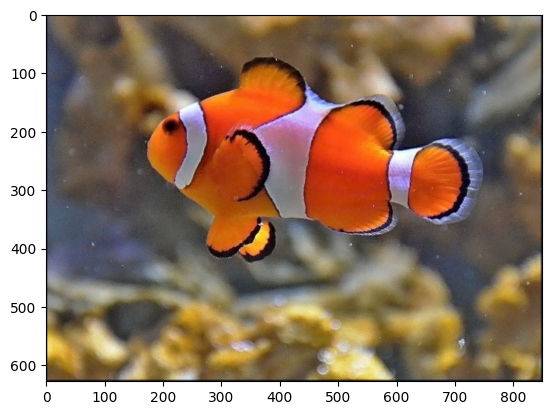

In [95]:
img = compress_image(loaded_image, 30)

plt.figure()
plt.imshow(img)
plt.show()